## DATA VISUALIZATION
Data visualization is a field in data analysis that deals with visual representation of data. It graphically plots data and is an effective way to communicate inferences from data.

Using data visualization, we can get a visual summary of our data. With pictures, maps and graphs, the human mind has an easier time processing and understanding any given data. Data visualization plays a significant role in the representation of both small and large data sets, but it is especially useful when we have large data sets, in which it is impossible to see all of our data, let alone process and understand it manually.

Python offers several plotting libraries, namely **Matplotlib, Seaborn** and many other such data visualization packages with different features for creating informative, customized, and appealing plots to present data in the most simple and effective way.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 1. Line Chart
A line chart shines when you're dealing with data that changes over a continuous range, like time or a sequence of events. It's your go-to choice when you want to:
- Show Trends Over Time: If you're tracking how something evolves or changes over days, months, years, or any continuous period, a line chart is your trusty sidekick.
- Highlight Patterns and Fluctuations: Line charts are great for revealing patterns and fluctuations in data. They make it easy to spot trends or irregularities.
- Compare Multiple Trends: If you have multiple data sets that you want to compare, each represented by a different line, a line chart allows for a clear visual comparison.
- Demonstrate Relationships: When you want to demonstrate a relationship between two variables and how changes in one affect the other, a line chart provides a clear picture.
- Visualize Progress: Whether it's financial performance, project milestones, or any form of progress over time, a line chart helps visualize the journey.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [3]:
# Displat data
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**Creating a Basic Line Chart Using Matpotlib**

In [5]:
# Transform datatype with pd.to_datetime
data["Month"] = pd.to_datetime(data["Month"])

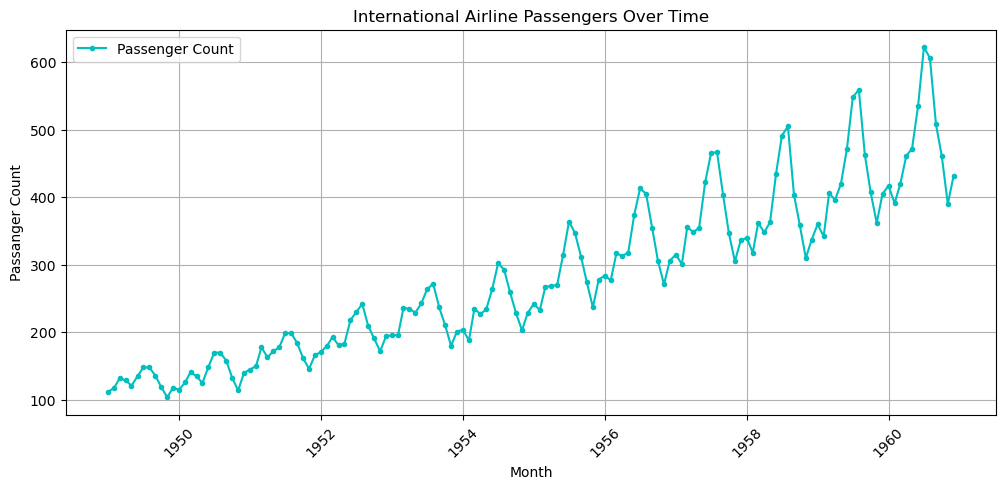

In [6]:
# Create a basic line chart
plt.figure(figsize=(12,5))
plt.plot(data['Month'], data['Passengers'],
        label='Passenger Count', color='c', marker='.')
plt.title('International Airline Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passanger Count')
plt.xticks(rotation=45, ha='center')
plt.legend()
plt.grid()
plt.show()

**Line Chart Using Seaborn**

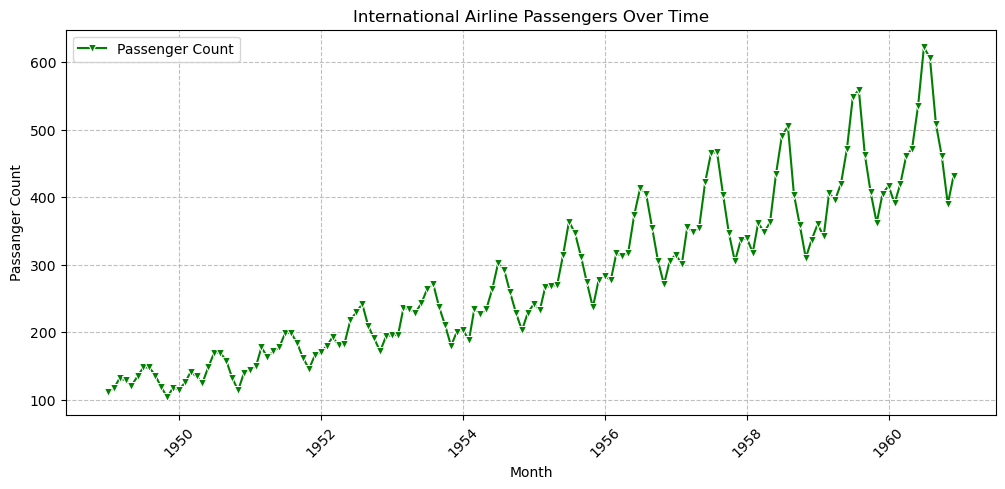

In [7]:
# Create a basic line chart
plt.figure(figsize=(12,5))
sns.lineplot(data=data, x='Month', y='Passengers',
             label='Passenger Count', color='g', marker='v')
plt.title('International Airline Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passanger Count')
plt.xticks(rotation=45, ha='center')
plt.legend()
plt.grid(linestyle='--', alpha=0.8)
plt.show()

#### 2. Bar Chart
A bar chart in data visualization is a graphical representation that uses rectangular bars to show the values of different categories. The length of each bar corresponds to the magnitude of the data it represents. Bar charts are effective for displaying and comparing discrete categories, making them a popular choice for visualizing categorical data.

We use bar charts in data visualization when we want to:

1. **Compare Categories:** Bar charts make it easy to compare the magnitude of different categories. Each bar represents a distinct category, and the height or length of the bar indicates the value it represents.
2. **Show Frequency or Distribution:** Bar charts are useful for displaying the frequency or distribution of categorical data. They provide a clear visual representation of how often each category occurs.
3. **Track Changes Over Time (in a Grouped Bar Chart):** Grouped bar charts allow us to compare sub-categories within each main category, making it suitable for showing changes over time or across different groups.
4. **Highlight Patterns or Trends:** Bar charts are effective in revealing patterns, trends, or disparities among different categories, making them valuable in drawing insights from data.

**Matpotlib**

In [8]:
# load the tips dataset
tips = sns.load_dataset("tips")

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


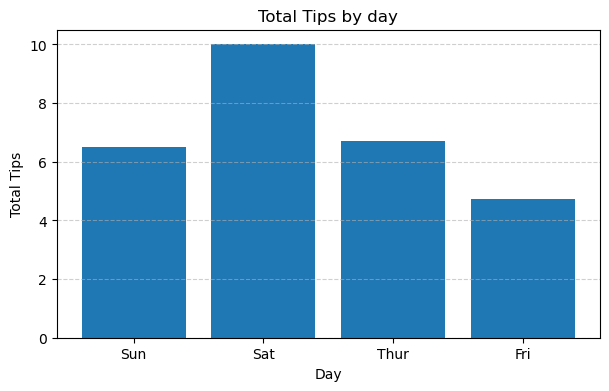

In [10]:
# Create a basic chart
plt.figure(figsize=(7,4))
plt.bar(tips['day'], tips['tip'])
plt.title('Total Tips by day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Seaborn**

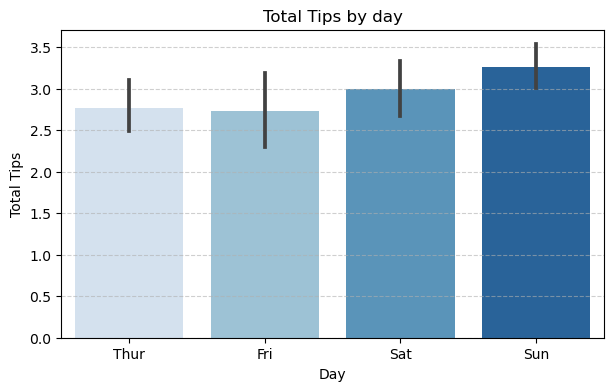

In [11]:
# Create a basic chart
plt.figure(figsize=(7,4))
sns.barplot(data=tips, x='day', y='tip', palette='Blues')
plt.title('Total Tips by day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Visualization with pandas(https://pandas.pydata.org/docs/user_guide/visualization.html)

In [12]:
# Group data
time_tip_totals = tips.groupby('time')['tip'].sum().reset_index()

In [13]:
time_tip_totals

,time,tip
0,Lunch,185.51
1,Dinner,546.07


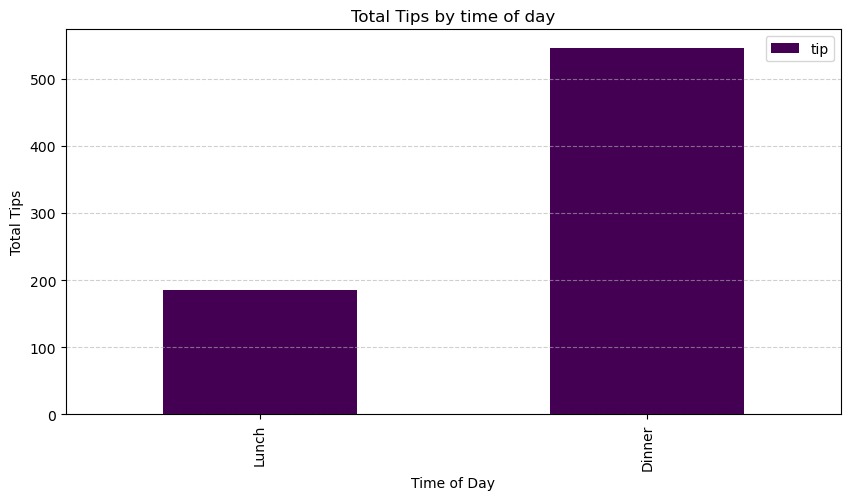

In [14]:
# Create a stacked bar chart for time tip
ax = time_tip_totals.plot(kind='bar', x='time', y='tip', stacked=True, figsize=(10,5), colormap='viridis')
plt.title('Total Tips by time of day')
plt.xlabel('Time of Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Numerical Label (https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)

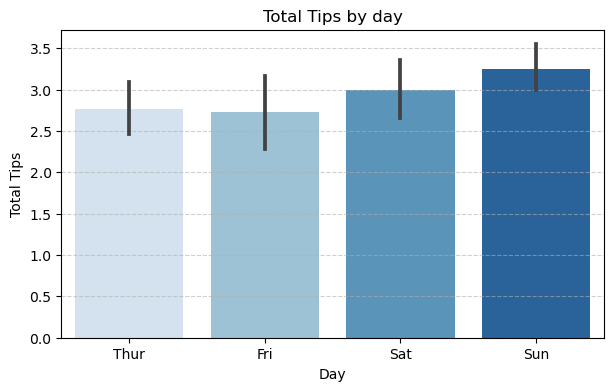

In [15]:
# create with numerical label
plt.figure(figsize=(7,4))
ax = sns.barplot(data=tips, x='day', y='tip', palette='Blues')
plt.title('Total Tips by day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Add numerical labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
               (p.get_x() + p.get_width() / 1.5, p.get_height()),
               textcoords='offset points', xytext=(0,10),
               ha='center', fontsize=8, color ='black')

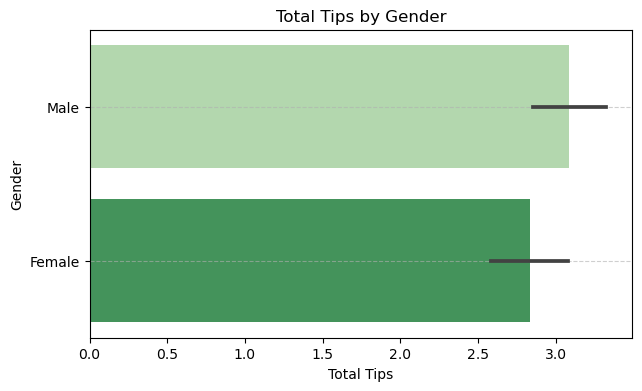

In [16]:
# Horizontal bar chart with numerical
# create with numerical label
plt.figure(figsize=(7,4))
ax = sns.barplot(data=tips, y='sex', x='tip', palette='Greens')
plt.title('Total Tips by Gender')
plt.xlabel('Total Tips')
plt.ylabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Add numerical labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
               (p.get_x() + p.get_width() / 1.5, p.get_height()),
               textcoords='offset points', xytext=(0,10),
               ha='center', fontsize=8, color ='black')

#### 3. Histograms
A histogram in data visualization is a graphical representation of the distribution of a continuous dataset. It consists of bars that represent the frequency or proportion of data falling into specific intervals, known as bins. The width of the bars corresponds to the range of values in each bin, and the height indicates the frequency or proportion.

We use histograms in data visualization when we want to:

1. **Visualize Data Distribution:** Histograms provide a clear visual representation of the distribution of continuous data, showing the central tendency and spread of values.
2. **Identify Patterns and Trends:** Histograms are effective for identifying patterns, trends, or anomalies in the data. They can reveal whether the data is skewed, symmetric, or has multiple peaks.
3. **Understand Data Shape:** By observing the shape of the histogram, one can infer characteristics such as normality, skewness, or kurtosis in the dataset.
4. **Determine Central Tendency and Dispersion:** Histograms help in assessing measures of central tendency (mean, median) and dispersion (range, standard deviation) of the data.
5. **Identify Outliers:** Unusual data points or outliers can be visually identified in a histogram, aiding in the detection of extreme values.

In summary, a histogram is a powerful tool for visualizing the distribution of continuous data. It is particularly useful when exploring the shape, patterns, and characteristics of datasets, providing insights into the underlying structure of the information being analyzed.

**Using Matpotlib**

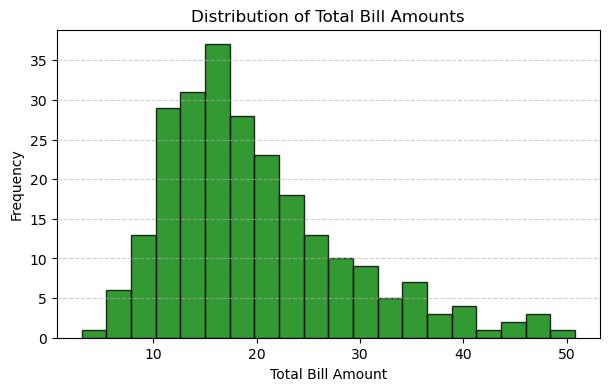

In [17]:
# Customizing the matpotlib histogram appereance
plt.figure(figsize=(7,4))
plt.hist(tips['total_bill'], bins=20, color='green', alpha=0.8, edgecolor='Black')
plt.title('Distribution of Total Bill Amounts')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Using Seaborn**

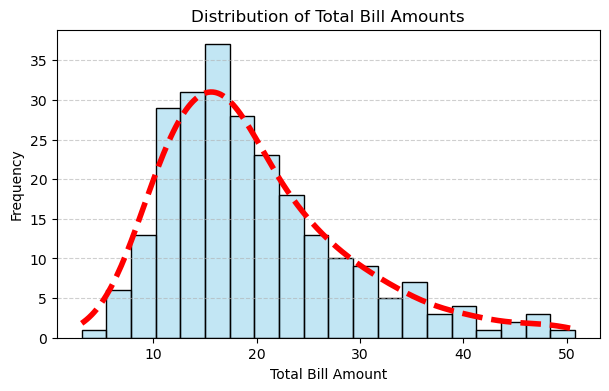

In [18]:
# Customizing the matpotlib histogram appereance
plt.figure(figsize=(7,4))
ax = sns.histplot(data=tips, x='total_bill', bins=20, kde=True, color='skyblue', line_kws = {'lw':4,'ls':'--'})
ax.lines[0].set_color('red') #line color
plt.title('Distribution of Total Bill Amounts')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### 4. Scatter Plot
A scatter plot in data visualization is a graphical representation that displays individual data points on a two-dimensional plane. Each point represents the values of two variables, with one variable on the x-axis and the other on the y-axis. The positioning of points reveals the relationship or correlation between the variables.

We use scatter plots in data visualization when we want to:

1. **Explore Relationships:** Scatter plots are ideal for examining the relationship between two continuous variables. They help identify patterns, trends, or potential correlations in the data.
2. **Detect Outliers:** Outliers, or unusual data points, can be easily spotted in a scatter plot. These points may have a significant impact on the overall pattern and can be crucial in understanding the data.
3. **Illustrate Correlation:** The clustering or dispersion of points in a scatter plot indicates the strength and direction of the correlation between variables. This is valuable in understanding how changes in one variable relate to changes in another.
4. **Visualize Trends:** Scatter plots can be enhanced with trendlines, helping to visualize trends or tendencies in the data. This is especially useful for making predictions or identifying patterns over time.
5. **Compare Groups:** By using different colors or shapes for data points representing different groups, scatter plots can illustrate group comparisons and reveal any differences in the patterns between groups.

In summary, a scatter plot is a versatile tool for exploring and visualizing relationships between two continuous variables. It provides valuable insights into patterns, correlations, and potential outliers in the data.

**Using Matpotlib**

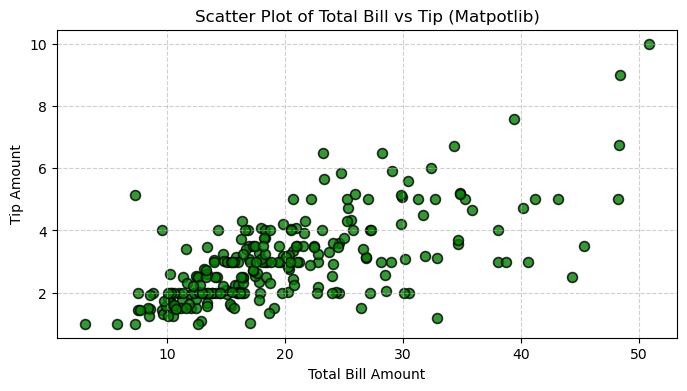

In [19]:
# Customizing the matpotlib scatterplot appereance
plt.figure(figsize=(8,4))
plt.scatter(tips['total_bill'], tips['tip'], color='green', marker='o', s=50, 
         alpha=0.8, edgecolor='Black', linewidths=1.2)
plt.title('Scatter Plot of Total Bill vs Tip (Matpotlib)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Using Seaborn**

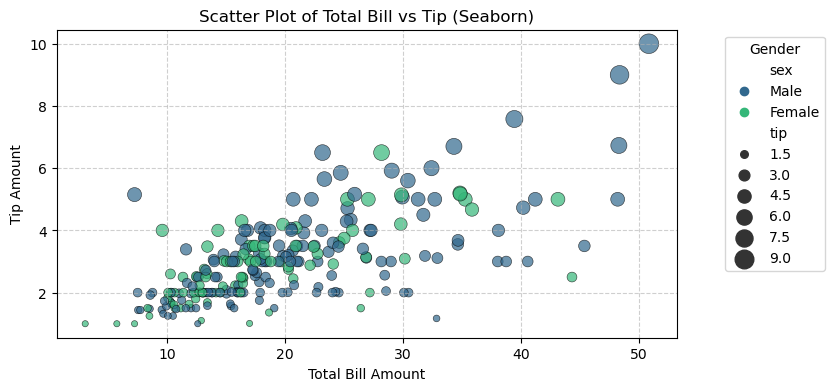

In [20]:
# Customizing the seaborn scatterplot appereance
plt.figure(figsize=(8,4))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', 
                palette='viridis', size='tip', sizes=(20,200),
                alpha=0.7, edgecolor='Black', linewidths=1.2)
plt.title('Scatter Plot of Total Bill vs Tip (Seaborn)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title ='Gender', loc ='upper right', bbox_to_anchor=(1.25,1))
plt.show()

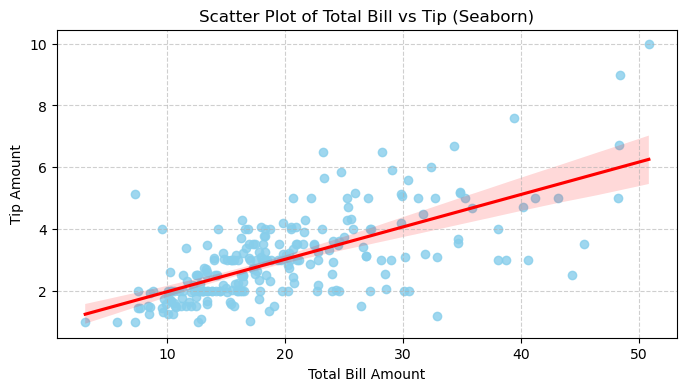

In [21]:
# Using Regplot
plt.figure(figsize=(8,4))
sns.regplot(data=tips, x='total_bill', y='tip',
            color='skyblue', line_kws=dict(color='r'))
plt.title('Scatter Plot of Total Bill vs Tip (Seaborn)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [22]:
from mpl_toolkits.mplot3d import Axes3D

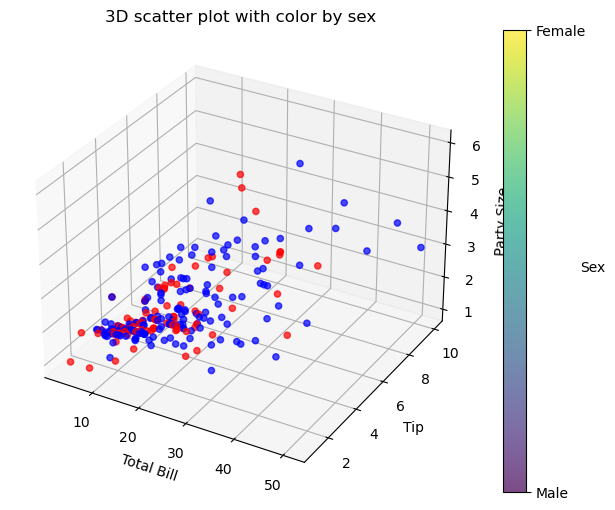

In [23]:
# Create a 3d scatter plot with color based on the sex column
fig = plt.figure(figsize=(8, 6))

#scatter plot with total bill, tip, and party size as x, y, and z axes
#color points based on the sex column
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tips['total_bill'], tips['tip'], tips['size'],
                    c=tips['sex'].map({'Male': 'blue', 'Female': 'red'}),
                    marker='o', alpha=0.7)

#label
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_zlabel('Party Size')

#create a colorbar to show the legend
legend_labels = ['Male', 'Female']
cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.set_label('Sex', rotation=0, labelpad = 5)
cbar.set_ticklabels(legend_labels)

plt.title('3D scatter plot with color by sex')
plt.show()

#### 5.Heatmap
A heatmap in data visualization is a graphical representation that uses colors to depict the intensity or density of values in a two-dimensional matrix or grid. Each cell in the matrix is assigned a color based on its value, creating a visual representation of patterns, trends, or variations in the data.

We use heatmaps in data visualization when we want to:

1. **Visualize Patterns in Large Datasets:** Heatmaps are effective for displaying patterns and structures in large datasets, especially when dealing with matrices or tables.
2. **Highlight Relationships:** Heatmaps can reveal relationships and correlations between variables by displaying how values change across rows and columns.
3. **Show Magnitude or Density:** The color gradient in a heatmap represents the magnitude or density of values. Darker colors often indicate higher values, allowing for quick interpretation of intensity.
4. **Cluster Analysis:** Heatmaps are useful in cluster analysis, helping identify groups of similar values or patterns within the data.
5. **Monitor Trends Over Time:** In time-series data, heatmaps can illustrate how values change over time, providing a dynamic visual representation.
6. **Compare Multivariate Data:** Heatmaps can handle multivariate data, allowing for the simultaneous visualization of multiple variables in a structured and easily interpretable format.

In summary, a heatmap is a powerful tool for visually representing and interpreting complex patterns and relationships in large datasets. It's particularly useful when dealing with matrices or tables and provides an intuitive way to understand the distribution and intensity of values across different dimensions.

In [24]:
# Create correlation matrix between numerical column
tips_num = tips.select_dtypes(exclude = 'object')
corr_matrix = tips_num.corr()

C:\Users\DIMAS\AppData\Local\Temp\ipykernel_10960\4122820806.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tips_num.corr()


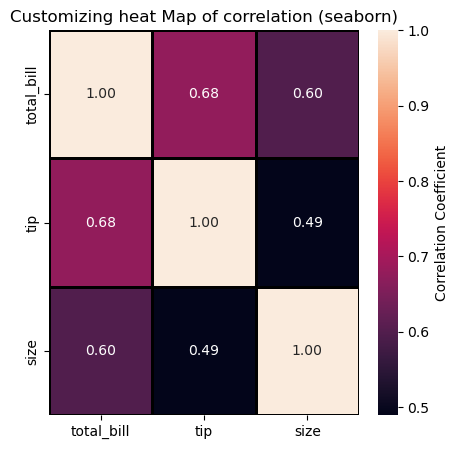

In [25]:
# customizing the seaborn heatmap appreance
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, linewidths=1,
           linecolor='black', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Customizing heat Map of correlation (seaborn)')
plt.show()

#### 6.Pie Chart
A pie chart in data visualization is a circular statistical graphic that is divided into slices to illustrate numerical proportions. Each slice represents a proportionate part of the whole, with the size of the slice corresponding to the relative magnitude of the data it represents.

We use pie charts in data visualization when we want to:

1. **Show Proportions:** Pie charts are effective for displaying the proportional contribution of each category to the whole. The area of each slice represents the percentage or fraction of the total.
2. **Highlight Percentages:** Pie charts are particularly useful when emphasizing percentages or relative distributions within a dataset.
3. **Illustrate Composition:** They help illustrate the composition of a whole by breaking it down into its constituent parts.
4. **Compare Categories:** Pie charts are suitable for comparing a small number of categories and their contributions to the overall composition.
5. **Provide a Quick Overview:** Pie charts offer a quick and intuitive overview of the distribution of categories, making them useful for conveying information at a glance.

However, it's important to use pie charts judiciously, as they may become less effective with too many categories or when precise comparisons between categories are necessary. They work best when conveying a broad sense of relative proportions within a dataset.

In [26]:
# calculate the sum of total bills for different days
bill_sum_by_day = tips.groupby('day')['total_bill'].sum()

# labels for each slice
labels = bill_sum_by_day.index

In [27]:
# set explode
explode = (0,0,0,0.1)

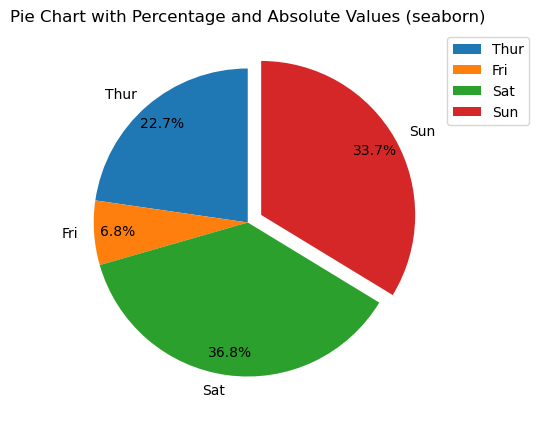

In [28]:
# display
plt.figure(figsize=(5,5))
plt.pie(bill_sum_by_day, labels=labels, autopct = '%1.1f%%',
       startangle=90, pctdistance=0.85, explode=explode)
plt.title('Pie Chart with Percentage and Absolute Values (seaborn)')
plt.legend(labels, loc='best', bbox_to_anchor=(1.0,1.0))
plt.show()

#### 7. Pair Plot
A pair plot in data visualization is a grid of scatter plots and histograms that provides a comprehensive view of the relationships between multiple variables in a dataset. In a pair plot, each variable is paired with every other variable, allowing for the simultaneous examination of both individual distributions and pairwise relationships.

We use pair plots in data visualization when we want to:

1. **Explore Multivariate Relationships:** Pair plots are useful for exploring the relationships between multiple variables in a dataset, revealing patterns, trends, or correlations.
2. **Identify Trends and Outliers:** By examining scatter plots, one can identify trends and patterns in the relationships between variables and detect potential outliers or anomalies.
3. **Understand Distributions:** The histograms along the diagonal of the pair plot display the univariate distribution of each variable, aiding in understanding the shape and spread of individual variables.
4. **Conduct Exploratory Data Analysis (EDA):** Pair plots are valuable in the exploratory data analysis phase, helping analysts and data scientists gain insights into the structure and characteristics of the dataset.
5. **Compare Variables Simultaneously:** Pair plots offer a simultaneous comparison of all variable pairs, providing a comprehensive overview of the interplay between different factors.

In summary, a pair plot is a versatile tool for exploring multivariate relationships in a dataset. It's particularly useful during the initial stages of data analysis when gaining insights into the overall structure and patterns within the data.

<Figure size 800x500 with 0 Axes>

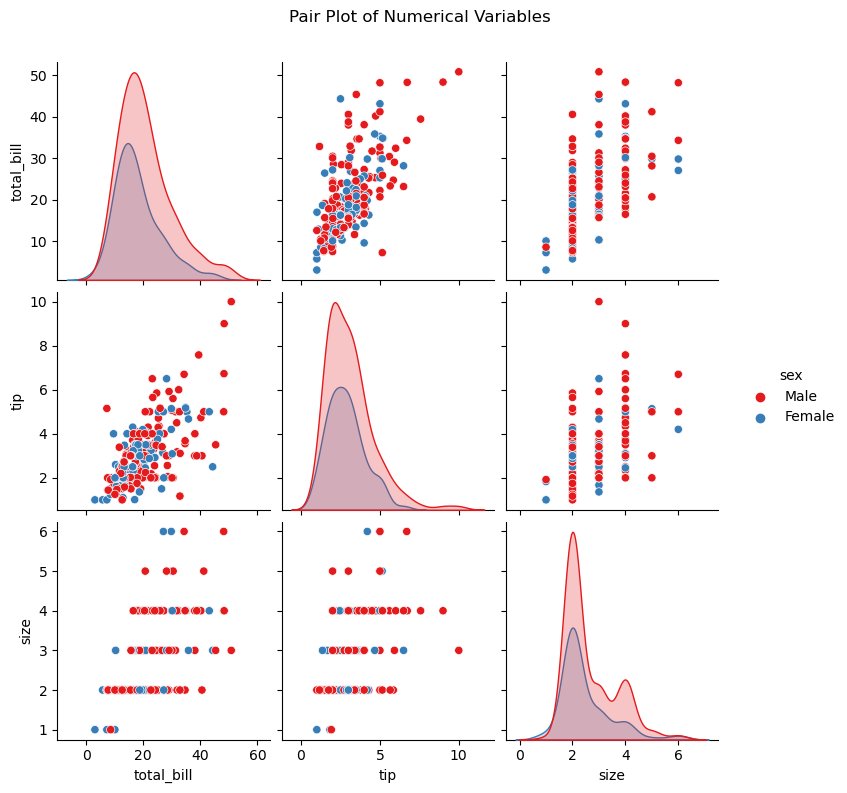

In [29]:
# create and display
plt.figure(figsize = (8,5))
sns.pairplot(data=tips, hue='sex', palette='Set1')
plt.suptitle('Pair Plot of Numerical Variables', y=1.05)
plt.show()

#### 8. Facet Grid
A facet grid in data visualization is a layout of multiple small charts or graphs arranged in a grid pattern, each representing a subset of the data based on specific categorical variables. It allows for the simultaneous visualization of various facets or segments of the dataset, making it easier to identify patterns, trends, and differences across categories.

We use facet grids in data visualization when we want to:

1. **Analyze Multidimensional Data:** Facet grids are effective for visualizing multidimensional data by breaking it down into subsets based on categorical variables. Each facet represents a unique combination of categories.
2. **Compare Subgroups:** Facet grids make it easy to compare subgroups within the data, providing a visual comparison of how different categories influence the relationships between variables.
3. **Explore Relationships Across Categories:** By organizing plots in a grid based on categorical variables, facet grids help explore how the relationships between variables vary across different categories.
4. **Identify Patterns in Segments:** Facet grids are valuable for identifying patterns, trends, or outliers within specific segments of the data, providing a more detailed understanding of the dataset.
5. **Conduct Comprehensive Analysis:** Facet grids are especially useful in exploratory data analysis (EDA) when researchers or analysts need to conduct a comprehensive analysis of the dataset by considering multiple dimensions simultaneously.

In summary, a facet grid is a powerful tool for visualizing and analyzing multidimensional data, allowing for a detailed examination of relationships within different subsets of the dataset. It's particularly beneficial when dealing with complex datasets with multiple categorical variables.

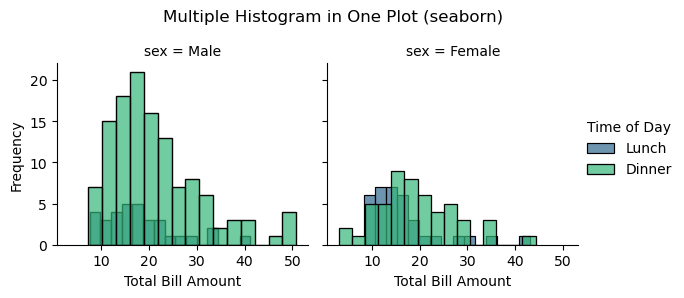

In [30]:
g= sns.FacetGrid(tips, col='sex', hue='time', palette='viridis')
g.map(sns.histplot, 'total_bill', bins=15, alpha=0.7)
g.add_legend(title='Time of Day')
g.set_axis_labels('Total Bill Amount', 'Frequency')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Multiple Histogram in One Plot (seaborn)')
plt.show()

## REFERENCE
1. https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python
2. https://towardsdatascience.com/data-visualization-using-python-422d7ac4cb65
3. https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
4. https://www.dataquest.io/blog/how-to-make-your-plots-appealing-in-python/